# Bagging



---




## Team Members: 

Technical writer: Murat Tinal

Author of executable content: Aruzhan Bolatova

Designer of interactive plots: Murat Tinal 

Designer of quizzes: Shyryn Akan

Project manager: Murat Tinal

---

<p><strong>Bagging </strong>(bootstrap aggregating) is an ensemble method that involves training multiple models independently on random subsets of the data, and aggregating their predictions through voting or averaging.</p>

<img src = "https://images.datacamp.com/image/upload/v1700592080/image3_78e8da325b.png"></img>



---

<p><strong>Bootstrap sampling</strong></p>

<p>In detail, each model is trained on a random subset of the data sampled with replacement, meaning that the individual data points can be chosen more than once. This random subset is known as a <strong>bootstrap sample. </strong>  By training models on different bootstraps, bagging reduces the <i>variance</i> of the individual models.  It also avoids overfitting by exposing the constituent models to different parts of the dataset.</p>

<img src = "https://blog.paperspace.com/content/images/2019/11/image-54.png"></img>


---

<img src = ""></img>

The predictions from all the sampled models are then combined through a simpe averaging to make the overall prediction. This way, the aggregated model incorporates the strengths of the individual ones and cancels out their errors.

<i>Bagging</i> is particularly effective in reducing variance and overfitting, making the model more robust and accurate, especially in cases where the individual models are prone to high variability.

In [1]:

example=[{
        "question": "Bagging aims to reduce the variance of individual models. Why is this important?" ,
        "type": "multiple_choice",
        "answers": [
            {
                "answer": "To increase bias",
                "correct": False,
                "feedback": "I hope not"
            },
            {
                "answer": "To avoid overfitting",
                "correct": True,
                "feedback": "Correct"
            },
            {
                "answer": "To make models more complex",
                "correct": False,
                "feedback": "I hope not"
            },
            {
                "answer": "To speed up model training",
                "correct": False,
                "feedback": "I hope not"
            }
        ]
    }
]
from jupyterquiz import display_quiz
display_quiz(example)
    


<IPython.core.display.Javascript object>

---

## Implementation of Bagging:

* Multiple subsets are created from the original data set with equal tuples, selecting observations with replacement.

* A base model is created on each of these subsets.

* Each model is learned in parallel with each training set and independent of each other.

* The final predictions are determined by combining the predictions from all the models.

*<img src = "https://blog.paperspace.com/content/images/2019/11/image-66.png"></img>

Consider the regression or classification setting.
We have pairs $\mathbf{(x_{i},y_{i}),(i=1, ...,n)}$
 
 where $\mathbf{x_{i} \in \mathbb{R}^{d}}$ denotes the $\mathbf{d}$-dimensional predictor variable and the response $y_{i} \in \mathbb{R}$ (*regression*)  or 

$\mathbf{y_{i} \in \left\{0,1,...,j-1 \right\}}$  (*classification with $\mathbf{j}$ classes*). 


The target function of interest is usually $\mathbf{\mathbb{E} \left [ y|x = x\right ]}$ for regression or the multivariate function $\mathbf{\mathbb{P}\left [ y = j | x = x \right ](j=0,...,j-1)}$ for classification.

*The function estimator, which is the result from a given base procedure, is :* 

$$\mathbf{\hat{g}(\cdot )=h_{n}((x_{1},y_{1}),...,(x_{n},y_{n}))(\cdot):\mathbb{R}^{d} \to \mathbb{R}}$$

where the function $\mathbf{h_{n}(\cdot)}$ defines the estimator as a function of the data. Bagging is defined as follows.
 

---

## Bagging algorithm

* **Step 1:** Construct a bootstrap sample $\mathbf{(x_{1}^{*}, y_{1}^{*}), ..., (x_{n}^{*}, y_{n}^{*})}$ randomly drawing $n$ times with replacement from the data $\mathbf{(x_{1},y_{1}), ..., (x_{n}, y_{n})}$ .


* **Step 2:** Compute the bootstrapped estimator $\mathbf{\hat{g}^{*}(\cdot)}$ by the plug-in principle:

$$\mathbf{\hat{g}^{*}(\cdot) = h_{n}((x_{1}^{*}, y_{1}^{*}),..., (x_{n}^{*},y_{n}))(\cdot)} $$

* **Step 3:** Repeat steps 1 and 2 $M$, where $M$ is often chosen as 50 or 100, yielding                             $\mathbf{\hat{g}^{*k}(\cdot)(k = 1, ..., M)}$.  

     **The bagged estimator is:** $$\mathbf{\hat{g}_{ Bag}(\cdot) = M^{-1}\sum_{k=1}^{M}\hat{g}^{*k}(\cdot)}$$ 

     **In theory, the bagged estimator is:** $$\mathbf{\hat{g}_{ Bag}(\cdot) = E^{*}\left [ \hat{g^{*}}(\cdot) \right ]}$$

---

In [2]:

example=[{
        "question": "In the bagging algorithm, if we have a dataset with n data points, each drawn from ℝ ^ d, and we construct a bootstrap sample by randomly drawing n times with replacement, what is the average number of unique data points in a single bootstrap sample?" ,
        "type": "multiple_choice",
        "answers": [
            {
                "answer": "n",
                "correct": False,
                "feedback": "I hope not"
            },
            {
                "answer": "3n",
                "correct": False,
                "feedback": "I hope not"
            },
            {
                "answer": "n/2",
                "correct": False,
                "feedback": "I hope not"
            },
            {
                "answer": "2n",
                "correct": True,
                "feedback": "Correct"
            }
        ]
    }
]
from jupyterquiz import display_quiz
display_quiz(example)
    


<IPython.core.display.Javascript object>

---


**``` Advantages of BAGGING: ```**
* The biggest advantage of bagging is that multiple weak learners can work better than a single strong learner.
* It provides stability and increases the machine learning algorithm’s accuracy, which is used in statistical classification and regression.
* It helps in reducing variance, i.e., it avoids overfitting.

**``` Disadvantages of BAGGING: ```**
* It may result in high bias if it is not modeled properly and thus may result in underfitting.
* Since we must use multiple models, it becomes computationally expensive and may not be suitable in various use cases.


---

## Practical implementation in Python 

> Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns 

> Load and split the dataset

We need to load our dataset before we can train our models. For this example, we're using the Breast Cancer dataset available in <strong><i>scikit-learn</i></strong>. We then split this data into training, validation, and testing sets.

In [4]:
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state = 42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

> Define ensemble training methods

Bagging involves training multiple instances of the same model on different subsamples of the dataset. Here, we've defined functions to: 
* Bootstrap samples our data.
* Train a model on a subset of our data.
* Create an ensemble of models.
* Use the ensemble to make predictions.

In [5]:
def bootstrap_sample(data, labels, size):
    indices = np.random.choice(len(data), size=size, replace=True)
    return data[indices], labels[indices]

def train_model_on_subset(data, labels):
    subset_data, subset_labels = bootstrap_sample(data, labels, size=len(data))
    model = DecisionTreeClassifier()
    model.fit(subset_data, subset_labels)
    return model

def create_ensemble(data, labels, num_models):
    models = []
    for _ in range(num_models):
        models.append(train_model_on_subset(data, labels))
    return models

def ensemble_predict(models, data_point):
    predictions = [model.predict([data_point])[0] for model in models]
    return np.bincount(predictions).argmax()

> Train the model and create training-validation curves

Training and validation curves provide insights into how well our model is performing. They can help diagnose issues like underfitting and overfitting.

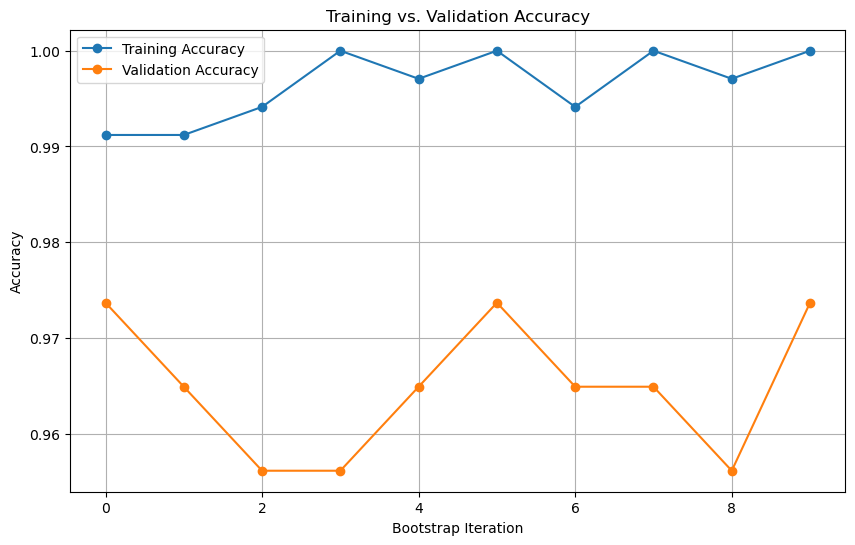

In [6]:
train_scores = []
val_scores = []

for _ in range(10):  # Train and evaluate 10 times
    models = create_ensemble(X_train, y_train, num_models=10)
    train_preds = [ensemble_predict(models, data_point) for data_point in X_train]
    val_preds = [ensemble_predict(models, data_point) for data_point in X_validation]

    train_scores.append(accuracy_score(y_train, train_preds))
    val_scores.append(accuracy_score(y_validation, val_preds))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_scores, label='Training Accuracy', marker='o')
plt.plot(val_scores, label='Validation Accuracy', marker='o')
plt.xlabel('Bootstrap Iteration')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

> Display the confusion matrix

A confusion matrix provides a visual representation of our model’s performance, showing where it made correct predictions and where it made errors.

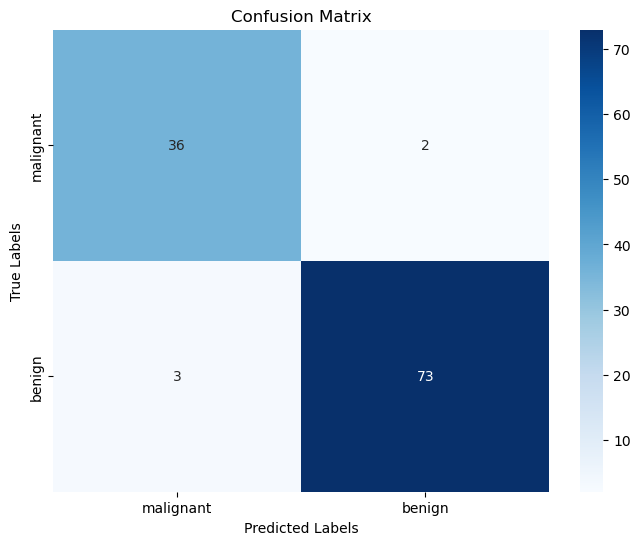

In [7]:
predictions = [ensemble_predict(models, data_point) for data_point in X_test]
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

> Print evaluation metrics

Lastly, we'll use <strong><i>classification_report</i></strong> to provide a comprehensive breakdown of our model's performance.

In [8]:
print(classification_report(y_test, predictions, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.92      0.95      0.94        38
      benign       0.97      0.96      0.97        76

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



---

**QUIZ** 

```python
import numpy as np
def bootstrap_samples(data):
    num_samples = len(data)
    indices = np.random.choice(num_samples, num_samples, replace=True)
    bootstrapped_data = data[indices]
    return bootstrapped_data
```

In [56]:

example=[{
        "question": "Examining the provided Python code block for bagging, what does the function bootstrap_samples(data)aim to achieve, and where can you find this information in the accompanying text?",
        "type": "multiple_choice",
        "answers": [
            {
                "answer": " Calculates the mean value of the dataset.",
                "correct": False,
                "feedback": "I hope not"
            },
            {
                "answer": "Selects a subset of data without replacement.",
                "correct": False,
                "feedback": "I hope not"
            },
            {
                "answer": "Randomly selects a subset of data with replacement.",
                "correct": True,
                "feedback": "Correct"
            },
            {
                "answer": "Shuffles the order of the dataset.",
                "correct": False,
                "feedback": "I hope not"
            }
        ]
    }
]
from jupyterquiz import display_quiz
display_quiz(example)
    



<IPython.core.display.Javascript object>

## Evaluating a Base Classifier

>*Let's start by importing the necessary modules.*

In [12]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

>*Next we need to load in the data and store it into X (input features) and y (target). The parameter as_frame is set equal to True so we do not lose the feature names when loading the data.*

In [13]:
data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

>*In order to properly evaluate our model on unseen data, we need to split X and y into train and test sets.*

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 22)

>*With our data prepared, we can now instantiate a base classifier and fit it to the training data.*

In [15]:
dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=22)

>*We can now predict the class of wine the unseen test set and evaluate the model performance.*

In [16]:
y_pred = dtree.predict(X_test)

print("Train data accuracy: ", accuracy_score(y_true = y_train,y_pred = dtree.predict(X_train)))
print("Test data accuracy: ", accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy:  1.0
Test data accuracy:  0.8222222222222222


>*Now that we have a baseline accuracy for the test dataset, we can see how the Bagging Classifier out performs a single Decision Tree Classifier.*

---

## Creating a Bagging Classifier

For bagging we need to set the parameter **n_estimators**, this is the number of base classifiers that our model is going to aggregate together.



> *We start by importing the necessary model.*

In [17]:
from sklearn.ensemble import BaggingClassifier


>*Now lets create a range of values that represent the number of estimators we want to use in each ensemble.*

In [18]:
estimator_range = [2,4,6,8,10,12,14,16]

>*To see how the Bagging Classifier performs with differing values of **n_estimators** we need a way to iterate over the range of values and store the results from each ensemble. To do this we will create a for loop, storing the models and scores in separate lists for later visualizations.*

>**Note:** *The default parameter for the base classifier in* ***BaggingClassifier*** *is the* ***DicisionTreeClassifier*** *therefore we do not need to set it when instantiating the bagging model.*

In [19]:
models = []
scores = []

for n_estimators in estimator_range:
    
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)
    clf.fit(X_train,y_train)
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

>*With the models and scores stored, we can now visualize the improvement in model performance.*


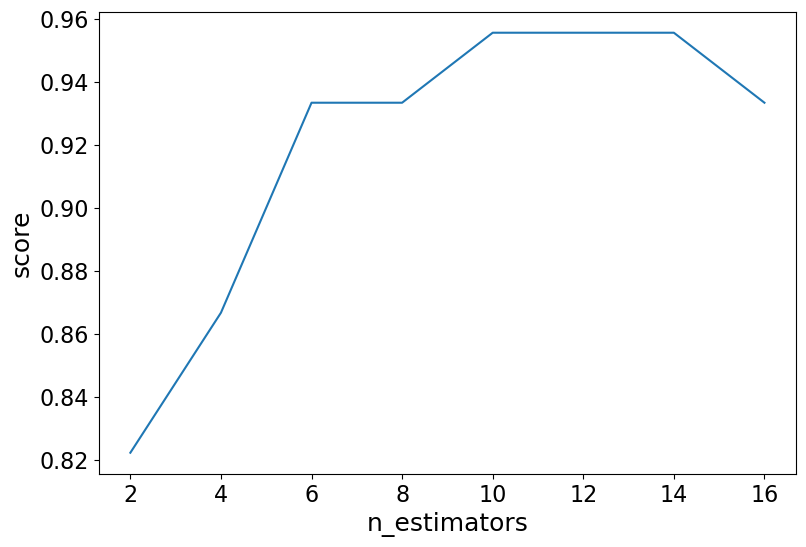

In [20]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (9,6))
plt.plot(estimator_range, scores)

plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

plt.show()

> _By iterating through different values for the number of estimators we can see an increase in model performance from **82.2%** to **95.5%**. After 14 estimators the accuracy begins to drop, again if you set a different random_state the values you see will vary. That is why it is best practice to use [cross validation](https://www.w3schools.com/python/python_ml_cross_validation.asp) to ensure stable results._

>_In this case, we see a **13.3%** increase in accuracy when it comes to identifying the type of the wine._

---

**QUIZ**
```python
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import datasets
from sklearn.metrics import accuracy_score

wine = datasets.load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
base_classifier = DecisionTreeClassifier(random_state=42)
base_classifier.fit(X_train, y_train)
base_predictions = base_classifier.predict(X_test)
base_accuracy = accuracy_score(y_test, base_predictions)
bagging_accuracies = []
num_estimators_range = [5, 10, 15, 20, 25]
for num_estimators in num_estimators_range:
    bagging_classifier = BaggingClassifier(base_classifier, n_estimators=num_estimators, random_state=42)
    bagging_classifier.fit(X_train, y_train)
    bagging_predictions = bagging_classifier.predict(X_test)
    bagging_accuracy = accuracy_score(y_test, bagging_predictions)
    bagging_accuracies.append(bagging_accuracy)
```

In [58]:

example=[{
        "question": "How is the accuracy of the base classifier (base_classifier) calculated in the provided code?",
        "type": "multiple_choice",
        "answers": [
            {
                "answer": "accuracy_score(y_test, base_predictions)",
                "correct": True,
                "feedback": "Correct"
            },
            {
                "answer": "base_classifier.score(X_test, y_test)",
                "correct": False,
                "feedback": "I hope not"
            },
            {
                "answer": "base_classifier.evaluate(X_test, y_test)",
                "correct": False,
                "feedback": "I hope not"
            },
            {
                "answer": "base_classifier.accuracy(X_test, y_test)",
                "correct": False,
                "feedback": "I hope not"
            }
        ]
    }
]
from jupyterquiz import display_quiz
display_quiz(example)
    


<IPython.core.display.Javascript object>

In [3]:
example=[{
        "question": "Which statement is correct about bagging?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "Many weak learners aggregated typically outperform a single learner over the entire set and have less overfit.",
                "correct": False,
                "feedback": "Correct."
            },
            {
                "answer": "It reduces the number of hyperparameters to tune.",
                "correct": False,
                "feedback": "No, it's not correct."
            },
            {
                "answer": "Reduces variance in high-variance datasets",
                "correct": True,
                "feedback": "Correct."
            },
            {
                "answer": "Improves the model’s accuracy",
                "correct": True,
                "feedback": "Correct."
            },
            {
                "answer": "Makes the model more complex.",
                "correct": False,
                "feedback": "No, it's not correct."
            },
            {
                "answer": "Works particularly well with algorithms that are less stable",
                "correct": True,
                "feedback": "No, it's not correct."
            }
        ]
    }
    

]
from jupyterquiz import display_quiz
display_quiz(example)

<IPython.core.display.Javascript object>